# Modélisation et etude de l'évolution d'une population

## Objectif

L'objectif est de modéliser une population de lapin qui peuvent se reproduire et qui sont limité par des resources (pour eviter une expension exponentielle).

Nous allons nous concentrer sur l'étude du comportement de la suite logistique

## Modéle

Le modèle utilisé pour modéliser cette population va donc être une suite logistique qui va representer la croissance et la limitation des ressources.

Cette suite se modélise par réccurence tel que:

$$ x_{i+1} = r (1-x_i)x_i $$

Mais aussi grace à une fonction que l'on introduit:

$$ f(x) = r (1-x) x $$

La suis s'exprime donc

$$ x_{i+1} = f(x_i) $$


### Import des différents modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Comportement de la suite

On remarque que la fonction n'a pour paramètre que r.

Etudions le comportement de la suite pour $r$ qui varie entre $2.5$ et $4$ et $x_0 = 0.1$ 

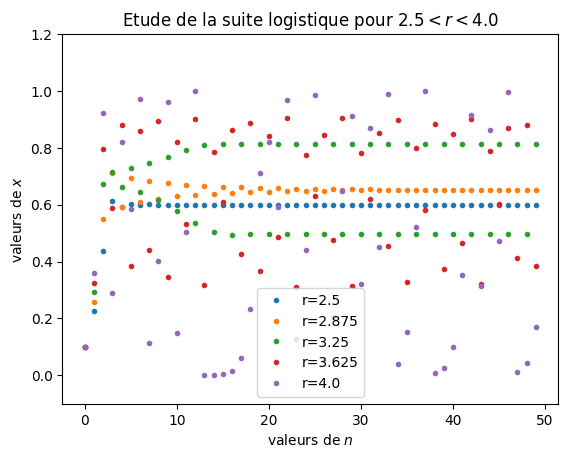

In [2]:
def f(x, r=2.5): # Définition de la fonciton logistique
    return r*(1-x)*x

R = np.linspace(2.5,4,5)
number_el = 50
for r in R:
    ns = np.arange(0,number_el,1)
    
    x = np.linspace(0,1.3)
    
    u0 = 0.1
    xs = [u0]
    for k in ns[1:]:
        u1 = f(u0, r=r)
        xs.append(u1)
        # Récurrence :
        u0 = u1
    plt.plot(ns, xs, '.', label=f"r={r}")


plt.title(r"Etude de la suite logistique pour $2.5<r<4.0$")
plt.xlabel(r"valeurs de $n$")
plt.ylabel(r"valeurs de $x$")
plt.ylim(-0.1,1.2)
plt.legend()
plt.show()

On remarque que la suite converge pour des valeur de r < 3.25. Alors que 3.25 < r < 3.625, f semble osciler vers 2 limites différentes.
Pour r > 3.625, la suite ne converge pas.

On remarque donc que pour une faible variation de r la convergence de la suite varie de convergente a non convergente
Le paramètre r est donc un paramètre chaotique

## Diagramme de bifurcation

Pour étudier plus profondément la fonction logistique, c'est à dire pour quelle valeur de r la suite converge, nous allons changer d'approche.

Sur un même graphe, on va afficher les 100 dérniers termes de la suite pour des valeurs de r continue (en réalité ce sera des valeurs de r discrétes mais très proches les unes des autres).

Nous en profiterons pour regarder l'impacte de $x_0$ sur la suite.

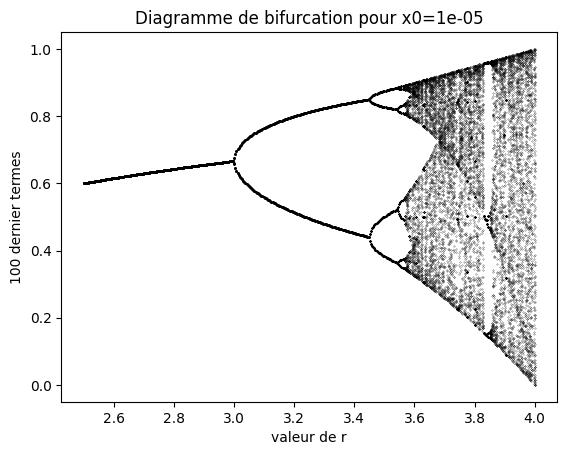

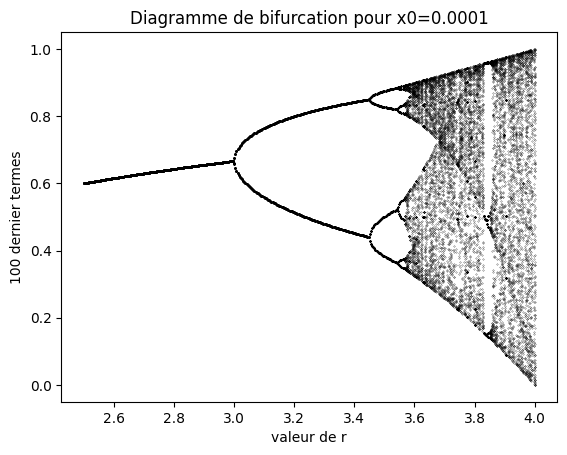

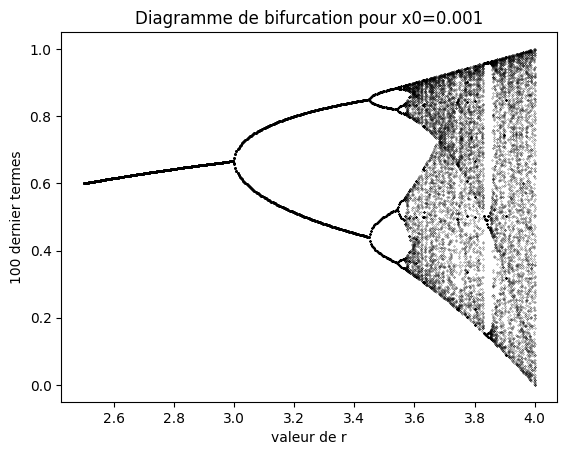

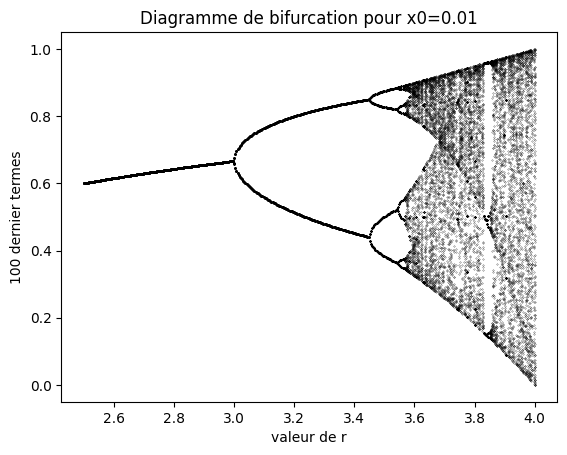

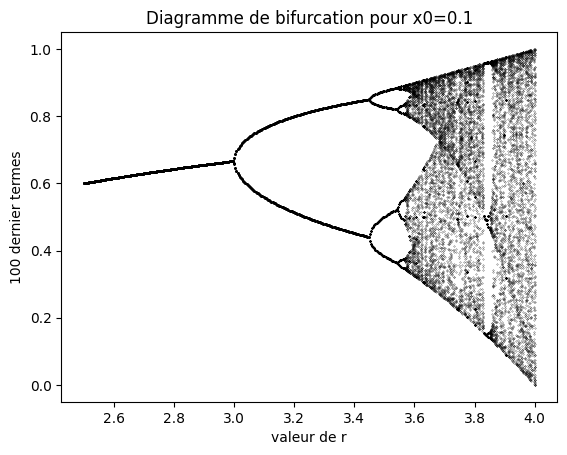

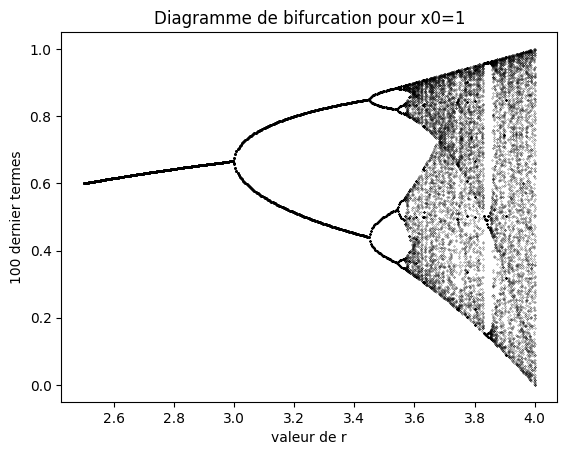

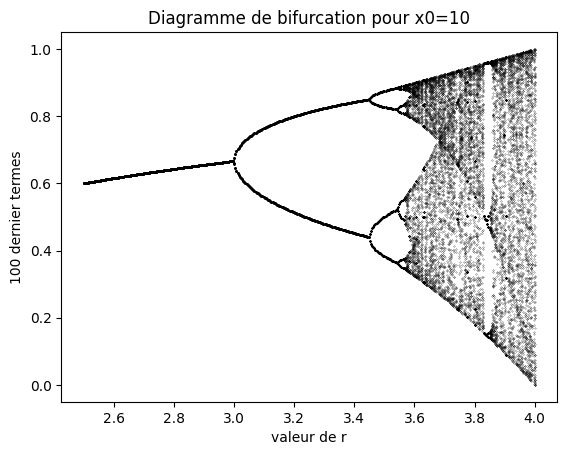

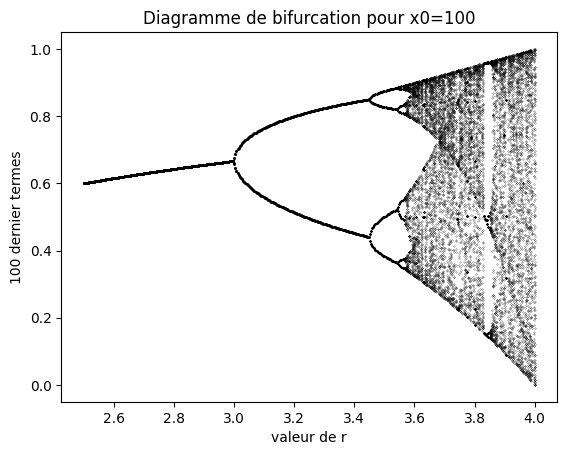

In [3]:
for x0 in [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 10, 100]:
    R = np.linspace(2.5,4,400)
    number_el = 1000
    for r in R:
        
        ns = np.arange(0,number_el,1)
        X = np.ndarray((number_el,))
        
        # Calculs de réccurences
        X[0] = 0.1
        for n in ns[1:]:
            X[n] = f(X[n-1], r=r)

        # Affichage des 100 derniers termes
        # np.ones(100,) est nécessaire pour que matplotlib recoive des tableau de même dimension
        plt.plot(np.ones(100,) * r, X[-100:], '.k', markersize=0.4)

    plt.xlabel(f"valeur de r")
    plt.ylabel("100 dernier termes")
    plt.title(f"Diagramme de bifurcation pour x0={x0}")
    plt.show()

Le diagramme de bifurcation représente bien la dépendance de r dans la convergence de la suite logistique.

On remarque que pour les valeurs de r entre 2.5 et 3.6, la suite logistique converge bien vers 1 ou plusieurs limites.

Au dela (entre 3.6 et 4.0) la suite est chaotique et diverge dans la majorité des r.

De plus on remarque que la valeur n'a aucun impacte sur la convergence de la suite. En effet touts les graphes ont la même forme contraiment à r qui change totalement le comportement de la suite

## Caractère chaotique et exposant de Lyapunov

Le paramètre $r$ étant chaotique, on peut trouver un exposant dit de Lyapunov $\lambda(r)$ qui dépend donc de $r$.

Cette exposant représente à quelle point la suite diverge ou converge et ceux de manière exponentielle comme $e^{t \lambda(r)}$

Il est intéressant de prendre cette représentation car une faible variation de r peut changer de manière radicale la convergence.

Pour $t \rightarrow \infty$
| $\lambda$ |  $ < 0$  |  $ = 0$  |  $> 0$  |
|-----------|:--------:|:--------:|:-------:|
|convergence| converge | bifurque | diverge |

On peut calculer $\lambda(r)$ de la manière suivante:

$$ \lambda = \lim\limits_{n \rightarrow \infty} \frac{1}{n} \sum_{i=0}^{n-1} \log | f^{\prime} (x_i)| $$

On nommera cette suite la suite de Lyapunov

### Définition des constantes et de df

In [12]:
# déifition des constantes
R = np.linspace(2.5,4.0,5000)
N = 10000 # n doit etre grand pour que la suite de Lyapunov est bien convergée
x0 = 1e-5

# Dérivé de la fonction logistique
def df(x, r=2.5):
    return r * (1-2*x)

### Calcule des $\lambda(r)$

In [10]:
lamb = np.ndarray(len(R))
colors = [] # Tableau contenant les couleur pour un affichage future

for i, r in enumerate(R):
    ns = np.arange(0, N, 1)
    X = np.ndarray(N)
    
    # réccurence
    X[0] = x0
    for n in ns[1:]:  
        X[n] = f(X[n-1], r=r)
    # calcule de l'ensemble des termes de la suite de Lyapunov en 1 appelle
    log_dfs = np.log(np.abs(df(X, r=r)))
    lamb[i] = log_dfs.sum() / N
    
    # définition des coleur en fonction lambda
    if lamb[i] <= 0:
        colors.append('k')
    else:
        colors.append('r')
    

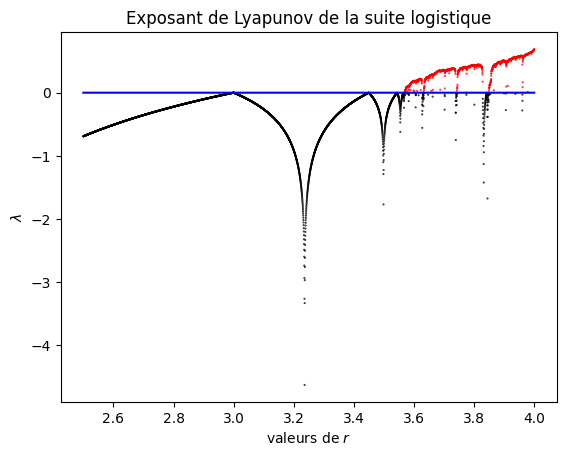

In [11]:
# On prend une cellule séparré ici car les calcules de la cellule précédent sont assez computationnel
plt.scatter(R, lamb, marker='.', c=colors, s=0.7)
plt.plot(R, np.zeros_like(R), 'b')
plt.title("Exposant de Lyapunov de la suite logistique")
plt.xlabel("valeurs de $r$")
plt.ylabel("$\lambda$")
plt.show()

Comme attendu, on remarque que pour toutes les valeurs de $\lambda$ négative, le paramètre r correspondant fait converger la suite.

On remarque également que lorsque lambda = 0, ça correspond à la séparation des branches dans le diagrame de bifuracation, la suite converge vers plus d'une valeur

De plus au dela de 3.6 on remaraque que $\lambda$ est majoritairement supérieur à 0 ce qui implique que la suite diverge. La fonction n'est plus stable pour la majorité des r supérieur à 3.6.

## Conclusion

Nous avons donc étudier la fonction logistique et sont caractère chaotique à cause de r.

Pour des r compris entre 3.6 et 4.0, il est difficile de prédire si la fonction convergera ou non sans une précision infinie sur r.

Pour rattacher l'étude de la fonction logistique à l'étude d'une population, on remarque que la part de lapin dépend au taux de croissance ici r, et ceux de manière chaotique.

En claire si on ne connait pas avec une précision infinie r, il est impossible de prédire si les lapins vont suivivre ou non aux cours des générations.